In [1]:
# Imported Modules

import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from figure_labeler import *

from IPython.display import HTML
HTML('''
<script
    src="https://cdnjs.cloudflare.com/ajax/libs/jquery/2.0.3/jquery.min.js ">
</script>
<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.jp-CodeCell > div.jp-Cell-inputWrapper').hide();
 } else {
$('div.jp-CodeCell > div.jp-Cell-inputWrapper').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit"
    value="Click here to toggle on/off the raw code."></form>
''')

In [2]:
fl = FigureLabeler();
pd.options.mode.chained_assignment = None

##### How to use the figure labeler

### Using the Table captioner ###
# fl.table_caption("Insert your Table title here",
#                  "Insert your Table sub-header here")
# display(your_df)

### Using the plot captioner ###
# plt.show()
# fl.fig_caption("Insert your plot title here",
#                "Insert your plot sub-header here")

<div style="text-align:center">
    <img src="sample_image.JPG" alt="sample image for the notebook" width="750">
</div>

<h1 style="text-align:center;">Table of Contents</h1>
<hr>

<a name="top"></a>

[ref0]: #exec_summary
- [Executive Summary][ref0]

[ref1]: #prob_stat
- [Problem Statement][ref1]

[ref2]: #motiv
- [Motivation][ref2]

[ref3]: #dat_sor
- [Data Source][ref3]

[ref4]: #dat_prep
- [Data Preprocessing][ref4]

[ref5]: #dat_expl
- [Data Exploration][ref5]

[ref6]: #res_dis
- [Results and Discussions][ref6]

[ref7]: #conc
- [Conclusion and Recommendations][ref7]

[ref8]: #refe
- [References][ref8]

***

<a name="exec_summary"></a>
## Executive Summary
***

This exploration investigated lottery participation patterns using various visualizations. The analysis revealed interesting trends, including a possible relationship between the prize money and number of participants and the same relationship being seen from the EDA which again, states the relationship of participants  towards the amount of the prize through being able to see the daily fluctuations. By incorporating a moving average, we were able to identify potential long-term trends and assess deviations through residual analysis. The distribution of winning numbers reveals that it is generally randomized with similar distributions apart from exceptions such as numbers that lie within the middle and outer parts with either greater or lower chances. Finally, location-based participation stated that locations of NCR, Visayas and Mindanao have equal rates of submission, while Luzon has the greatest amount of submissions.

These findings suggest potential areas for further exploration. Correlational analysis could examine relationships between participation and external factors. Predictive models could forecast future trends. Segmentation analysis could reveal variations across participant groups. By delving deeper into these areas, we can gain a comprehensive understanding of lottery participation dynamics and develop strategies to increase participation by people from differing locations around the country, or find better ways to distribute the prize winning in order to increase participants.

[ref]: #top
[Back to Table of Contents][ref]

<a name="prob_stat"></a>
## Problem Statement
***

This analysis utilizes time series techniques to uncover trends and patterns within Philippine lotto data. We'll specifically focus on the 6/42 format, encompassing all regions (Luzon, Visayas, Mindanao, and NCR). This selection simplifies the analysis by maintaining a consistent number of possible winning combinations (42) and potentially leveraging a longer record compared to newer formats. Examining data from all regions provides a comprehensive national perspective, allowing us to identify potential regional variations or similarities in winning number patterns over time.

[ref]: #top
[Back to Table of Contents][ref]

<a name="motiv"></a>
## Motivation
***

Understanding patterns in lottery data, while not a guaranteed path to winning, can be an intriguing exercise in probability and time series analysis. By analyzing simulated data for the 6/42 lotto across all Philippine regions, we hope to gain insights into potential trends and recurring number combinations. This analysis can contribute to the broader understanding of randomness and the limitations of predicting lottery outcomes. Additionally, the chosen format (6/42) offers a manageable complexity for time series analysis while potentially providing a longer data record for a more robust analysis.

[ref]: #top
[Back to Table of Contents][ref]

<a name="dat_sor"></a>
## Data Source
***

The data for this Jupyter Notebook was obtained from Blackboard, provided by the instructor for Module 1 Exam in the subject "Time Series Analysis and Stochastic Processes". The dataset consists of simulated PCSO Lottery data and is for educational purposes only. It contains two parts:

**Simulated PCSO Lottery Dataset Link:** This link provides a downloadable .zip archive containing various simulated lottery datasets. It is important to note that this data is for educational purposes only and does not include any real information from PCSO.

**lotto_draw_results.csv:** This CSV file contains the simulated draw results, including winning numbers and the number of winners for each draw

[ref]: #top
[Back to Table of Contents][ref]

<a name="dat_prep"></a>
## Data Preprocessing
***
This section provides an overview of the data used in this analysis. The data dictionaries will be presented after creating some additional derived columns for clarity.

**1. `data` (Simulated Lottery Samples):**

This DataFrame contains information about simulated lottery tickets. Each row represents a single ticket.

* **`dates` (datetime):**  Timestamp indicating when the ticket was submitted.
* **`num1` (int):**  First lottery number selected on the ticket (between 1 and 42).
* **`num2` (int):**  Second lottery number selected on the ticket (between 1 and 42).
* **`num3` (int):**  Third lottery number selected on the ticket (between 1 and 42).
* **`num4` (int):**  Fourth lottery number selected on the ticket (between 1 and 42).
* **`num5` (int):**  Fifth lottery number selected on the ticket (between 1 and 42).
* **`num6` (int):**  Sixth lottery number selected on the ticket (between 1 and 42).
* **`location` (string):**  Region where the ticket was submitted ("Luzon", "Visayas", "Mindanao", or "NCR").
* **`whole_nums` (string):**  Formatted string representing the chosen lottery numbers (e.g., "01-02-06-16-27-31"). (Created after initial data processing)
* **`month` (string):**  Month ("January", "February", etc.) extracted from the `dates` column. (Created after initial data processing)

**2. `lottoResults6_42` (Winning Results - 6/42 Category):**

This DataFrame contains information about winning numbers for the simulated lottery, specifically for the 6/42 category. Each row represents a single drawing.

* **`lotto_game` (string):**  Always "6/42" since this DataFrame focuses on that specific category.
* **`winning_nums` (string):**  Formatted string representing the winning lottery numbers for a particular drawing (e.g., "01-02-06-16-27-31").
* **`date` (datetime):**  Date of the lottery drawing.
* **`prize` (float):**  Total prize money awarded for the winning numbers in Philippine pesos.
* **`num_winners` (int):**  Number of tickets that matched the winning numbers for that particular drawing.


The process for creating the additional columns (`whole_nums` and `month`) will be explained in the following section. 

[ref]: #top
[Back to Table of Contents][ref]

In [3]:
# Importing the libraries
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from scipy.interpolate import interp1d
from statsmodels.graphics.tsaplots import plot_acf

In [4]:
# Step 1: Specify the top-level directory
top_directory = r"C:\Users\villa\Official-Folder\Data-Science\DS\DS150\Module-1-Exam\lottery_data\data\6-42"

# Step 2: Initialize an empty DataFrame to store the merged data
merged_data = pd.DataFrame()

# Step 3: Traverse through the directory tree
for root, dirs, files in os.walk(top_directory):
    # Step 4: Check if CSV files are present in the current directory
    csv_files = [file for file in files if file.lower().endswith(".csv")]

    if csv_files:
        # Step 5: Read and merge CSV files into a single DataFrame
        for csv_file in csv_files:
            file_path = os.path.join(root, csv_file)
            current_data = pd.read_csv(file_path)
            
            # Add new columns 'SourceFolder' and 'SourceCsv'
            current_data['SourceFolder'] = os.path.basename(root)
            current_data['SourceCsv'] = csv_file
            
            merged_data = pd.concat([merged_data, current_data], ignore_index=True)

# Optional: Display or further process the merged DataFrame
print(merged_data)

          num1  num2  num3  num4  num5  num6 SourceFolder    SourceCsv
0           15    28    46    49    51    56   2022-01-04    luzon.csv
1            1     2     6    16    27    31   2022-01-04    luzon.csv
2           31    32    33    51    54    58   2022-01-04    luzon.csv
3            2     5     9    12    15    27   2022-01-04    luzon.csv
4           14    20    33    38    48    50   2022-01-04    luzon.csv
...        ...   ...   ...   ...   ...   ...          ...          ...
25703597     5    12    20    21    32    42   2023-12-30  visayas.csv
25703598     9    10    18    24    25    31   2023-12-30  visayas.csv
25703599     5    22    28    42    47    55   2023-12-30  visayas.csv
25703600     2    14    27    28    29    50   2023-12-30  visayas.csv
25703601    19    39    42    50    56    58   2023-12-30  visayas.csv

[25703602 rows x 8 columns]


In [5]:
# Specify the six column names to check for values greater than 42
your_column_names = ['num1', 'num2', 'num3', 'num4', 'num5', 'num6']

# Specify the values to exclude from 'SourceFolder' and 'SourceCsv'
exclude_source_folder = 'exclude_folder_name'
exclude_source_csv = 'exclude_csv_name'

# Create a mask for rows that meet the condition in any of the six columns
condition_mask = (merged_data[your_column_names] <= 42).all(axis=1)

# Apply the condition and exclude specific SourceFolder and SourceCsv values
cleaned_data = merged_data[(condition_mask) |
                           ((merged_data['SourceFolder'] == exclude_source_folder) &
                            (merged_data['SourceCsv'] == exclude_source_csv))]

# Reset the index of the DataFrame
cleaned_data.reset_index(drop=True, inplace=True)

# Optional: Display the cleaned data
print(cleaned_data)

          num1  num2  num3  num4  num5  num6 SourceFolder    SourceCsv
0            1     2     6    16    27    31   2022-01-04    luzon.csv
1            2     5     9    12    15    27   2022-01-04    luzon.csv
2            1     5    18    23    29    38   2022-01-04    luzon.csv
3            4     8    15    17    27    31   2022-01-04    luzon.csv
4            3     4    22    25    27    38   2022-01-04    luzon.csv
...        ...   ...   ...   ...   ...   ...          ...          ...
13081032     1     3     4    14    20    25   2023-12-30  visayas.csv
13081033     2     4     6    11    23    28   2023-12-30  visayas.csv
13081034     3     4     7    13    20    27   2023-12-30  visayas.csv
13081035     5    12    20    21    32    42   2023-12-30  visayas.csv
13081036     9    10    18    24    25    31   2023-12-30  visayas.csv

[13081037 rows x 8 columns]


In [6]:
data = cleaned_data

# Rename "SourceCsv" column to "location" and map unique values
location_map = {'luzon.csv': 'Luzon', 'visayas.csv': 'Visayas', 'ncr.csv': 'NCR', 'mindanao.csv': 'Mindanao'}
data['location'] = data['SourceCsv'].replace(location_map)

# Rename "SourceFolder" column to "dates"
data.rename(columns={'SourceFolder': 'dates'}, inplace=True)

# Delete "SourceCsv" column
del data['SourceCsv']

# Print the dataframe
print(data)

          num1  num2  num3  num4  num5  num6       dates location
0            1     2     6    16    27    31  2022-01-04    Luzon
1            2     5     9    12    15    27  2022-01-04    Luzon
2            1     5    18    23    29    38  2022-01-04    Luzon
3            4     8    15    17    27    31  2022-01-04    Luzon
4            3     4    22    25    27    38  2022-01-04    Luzon
...        ...   ...   ...   ...   ...   ...         ...      ...
13081032     1     3     4    14    20    25  2023-12-30  Visayas
13081033     2     4     6    11    23    28  2023-12-30  Visayas
13081034     3     4     7    13    20    27  2023-12-30  Visayas
13081035     5    12    20    21    32    42  2023-12-30  Visayas
13081036     9    10    18    24    25    31  2023-12-30  Visayas

[13081037 rows x 8 columns]


In [7]:
data = cleaned_data

In [8]:
data["whole_nums"] = data[["num1", "num2", "num3", "num4", "num5", "num6"]].apply(
    lambda x: "-".join(f"{v:02d}" for v in x if v is not None), axis=1)

In [9]:
data = data.reset_index()  # Resets index and makes "dates" a column
data['month'] = pd.to_datetime(data['dates']).dt.month_name()
data['year'] = pd.to_datetime(data['dates']).dt.year

In [10]:
data

,index,num1,num2,num3,num4,num5,num6,dates,location,whole_nums,month,year
0,0,1,2,6,16,27,31,2022-01-04,Luzon,01-02-06-16-27-31,January,2022
1,1,2,5,9,12,15,27,2022-01-04,Luzon,02-05-09-12-15-27,January,2022
2,2,1,5,18,23,29,38,2022-01-04,Luzon,01-05-18-23-29-38,January,2022
3,3,4,8,15,17,27,31,2022-01-04,Luzon,04-08-15-17-27-31,January,2022
4,4,3,4,22,25,27,38,2022-01-04,Luzon,03-04-22-25-27-38,January,2022
...,...,...,...,...,...,...,...,...,...,...,...,...
13081032,13081032,1,3,4,14,20,25,2023-12-30,Visayas,01-03-04-14-20-25,December,2023
13081033,13081033,2,4,6,11,23,28,2023-12-30,Visayas,02-04-06-11-23-28,December,2023
13081034,13081034,3,4,7,13,20,27,2023-12-30,Visayas,03-04-07-13-20-27,December,2023
13081035,13081035,5,12,20,21,32,42,2023-12-30,Visayas,05-12-20-21-32-42,December,2023


In [12]:
file = r"C:\Users\villa\Official-Folder\Data-Science\DS\DS150\Module-1-Exam\lotto_draw_results.csv"
lottoResults = pd.read_csv(file)
lottoResults.head()

,lotto_game,winning_nums,date,prize,num_winners
0,6-58,10-25-01-35-04-58,2022-01-02,54346532.8,0
1,6-49,24-31-43-28-30-42,2022-01-02,108246513.2,0
2,6-55,01-39-02-24-16-33,2022-01-03,49182969.4,0
3,6-45,24-08-25-32-12-30,2022-01-03,8910000.0,0
4,6-58,43-26-46-52-32-14,2022-01-04,57293039.8,0


In [13]:
lottoResults6_42 = lottoResults[lottoResults['lotto_game'] == '6-42']
lottoResults6_42.head()

,lotto_game,winning_nums,date,prize,num_winners
6,6-42,12-16-08-11-01-18,2022-01-04,38829392.8,0
9,6-42,23-01-09-24-12-07,2022-01-06,42945708.2,4
14,6-42,32-41-15-25-18-22,2022-01-08,5940000.0,0
21,6-42,35-28-25-36-31-03,2022-01-11,5940000.0,0
25,6-42,18-15-33-27-07-14,2022-01-13,7068747.4,0


<a name="dat_expl"></a>
## Data Exploration
***

[ref]: #top
[Back to Table of Contents][ref]

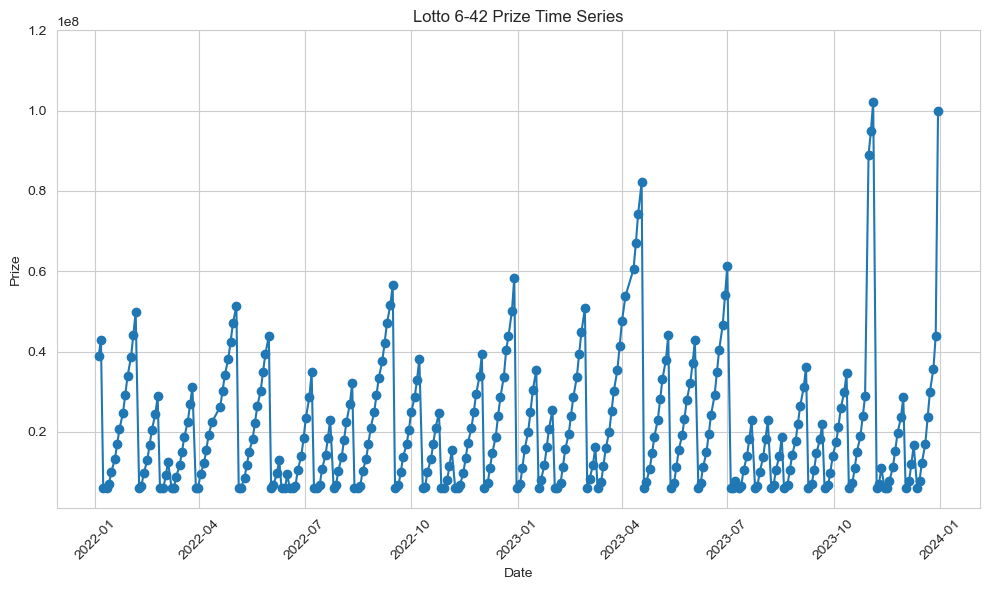

In [14]:
lottoResults6_42['date'] = pd.to_datetime(lottoResults6_42['date'])

# Set the 'date' column as the index
lottoResults6_42.set_index('date', inplace=True)

# Sort the DataFrame by index
lottoResults6_42.sort_index(inplace=True)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(lottoResults6_42.index, lottoResults6_42['prize'], marker='o', linestyle='-')
plt.ylim(1e6, 1.2e8)  # Set y-axis limits from 1 million to 120 million
plt.title('Lotto 6-42 Prize Time Series')
plt.xlabel('Date')
plt.ylabel('Prize')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

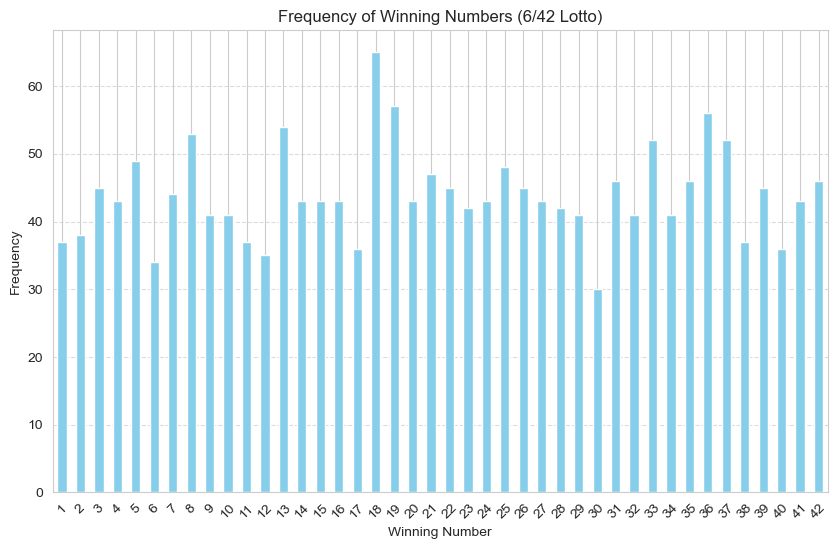

In [15]:
winning_numbers = lottoResults6_42['winning_nums'].str.split('-').apply(lambda x: [int(num) for num in x])

# Flatten the list of winning numbers
winning_numbers_flat = [num for sublist in winning_numbers for num in sublist]

# Count the frequency of each winning number
winning_numbers_count = pd.Series(winning_numbers_flat).value_counts().sort_index()

# Plot the distribution of winning numbers
plt.figure(figsize=(10, 6))
winning_numbers_count.plot(kind='bar', color='skyblue')
plt.title('Frequency of Winning Numbers (6/42 Lotto)')
plt.xlabel('Winning Number')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### Frequency of Winning Numbers (6/42 Lotto)

This graph illustrates the frequency distribution of winning numbers across all drawings in the 6/42 lottery data set. Each bar represents a specific number (on the x-axis) and its corresponding frequency of appearing as a winning number (on the y-axis). The higher the bar, the more frequently that number has been drawn as a winner. 

In [16]:
data

,index,num1,num2,num3,num4,num5,num6,dates,location,whole_nums,month,year
0,0,1,2,6,16,27,31,2022-01-04,Luzon,01-02-06-16-27-31,January,2022
1,1,2,5,9,12,15,27,2022-01-04,Luzon,02-05-09-12-15-27,January,2022
2,2,1,5,18,23,29,38,2022-01-04,Luzon,01-05-18-23-29-38,January,2022
3,3,4,8,15,17,27,31,2022-01-04,Luzon,04-08-15-17-27-31,January,2022
4,4,3,4,22,25,27,38,2022-01-04,Luzon,03-04-22-25-27-38,January,2022
...,...,...,...,...,...,...,...,...,...,...,...,...
13081032,13081032,1,3,4,14,20,25,2023-12-30,Visayas,01-03-04-14-20-25,December,2023
13081033,13081033,2,4,6,11,23,28,2023-12-30,Visayas,02-04-06-11-23-28,December,2023
13081034,13081034,3,4,7,13,20,27,2023-12-30,Visayas,03-04-07-13-20-27,December,2023
13081035,13081035,5,12,20,21,32,42,2023-12-30,Visayas,05-12-20-21-32-42,December,2023


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13081037 entries, 0 to 13081036
Data columns (total 12 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   index       int64 
 1   num1        int64 
 2   num2        int64 
 3   num3        int64 
 4   num4        int64 
 5   num5        int64 
 6   num6        int64 
 7   dates       object
 8   location    object
 9   whole_nums  object
 10  month       object
 11  year        int32 
dtypes: int32(1), int64(7), object(4)
memory usage: 1.1+ GB


In [18]:
unique_locations = data['location'].unique()
unique_locations

array(['Luzon', 'Mindanao', 'NCR', 'Visayas'], dtype=object)

In [19]:
unique_locations = data['location'].unique()

# Count the frequency of each location
location_counts = data['location'].value_counts()

# Print the results
print("Unique Locations:")
print(unique_locations)
print("\nFrequency of Locations:")
print(location_counts)

Unique Locations:
['Luzon' 'Mindanao' 'NCR' 'Visayas']

Frequency of Locations:
location
Luzon       5813506
Mindanao    2597402
Visayas     2538543
NCR         2131586
Name: count, dtype: int64


In [20]:
unique_months = data['month'].unique()
unique_months

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype=object)

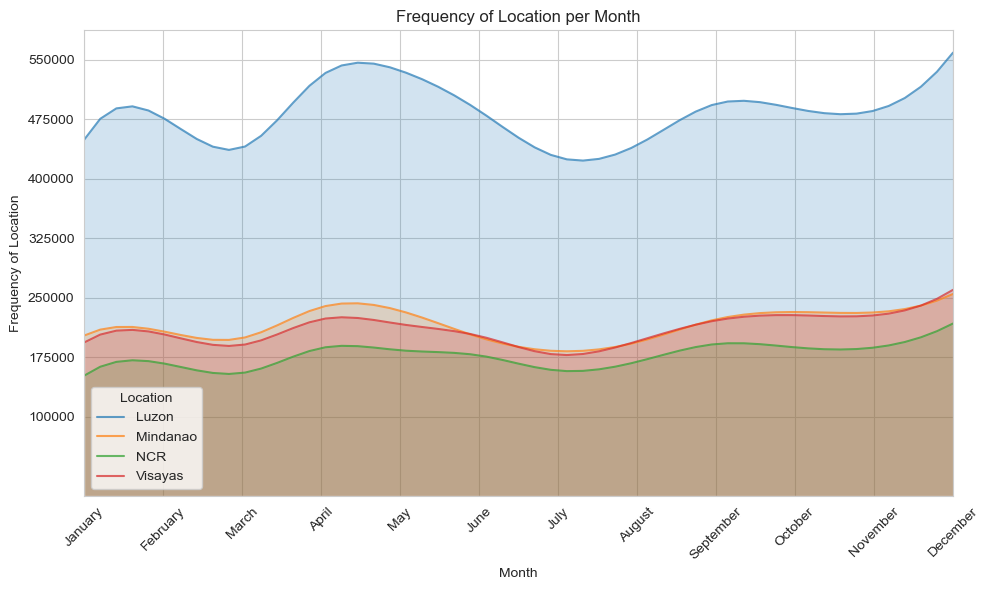

In [21]:
# Count the frequency of each location per month
location_counts_per_month = data.groupby(['month', 'location']).size().unstack(fill_value=0)

# Reorder the months
months_ordered = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
location_counts_per_month = location_counts_per_month.reindex(months_ordered, axis=0)

# Plotting
plt.figure(figsize=(10, 6))

# Smoothness factor
smoothness = 5

# Interpolate between data points for smoother lines
x = np.arange(len(location_counts_per_month))
x_new = np.linspace(0, len(location_counts_per_month) - 1, smoothness * (len(location_counts_per_month) - 1))
for location in location_counts_per_month.columns:
    y = location_counts_per_month[location].values
    f = interp1d(x, y, kind='cubic')
    plt.plot(x_new, f(x_new), label=location, alpha=0.7)
    plt.fill_between(x_new, f(x_new), alpha=0.2)

# Set labels and legend
plt.xlabel('Month')
plt.ylabel('Frequency of Location')
plt.title('Frequency of Location per Month')
plt.xticks(np.arange(len(location_counts_per_month)), location_counts_per_month.index, rotation=45)
plt.yticks(np.arange(100000, 625000, 75000))
plt.xlim(0, len(location_counts_per_month) - 1)  # Set x-axis limits from 0 to the length of months - 1
plt.ylim(0)  # Set y-axis limits to start from zero
plt.legend(title='Location')

plt.tight_layout()
plt.show()

#### Frequency of Ticket Submissions by Location and Month

This graph visualizes the distribution of lottery ticket submissions across different locations (Luzon, Visayas, Mindanao, NCR) throughout the year. The x-axis represents the month (reordered alphabetically for clarity), and the y-axis represents the frequency of tickets submitted from each location in that particular month. The lines with filled areas represent smoothed trends for each location, highlighting potential seasonal variations in ticket purchases across different regions. The legend clarifies the colors associated with each location. 

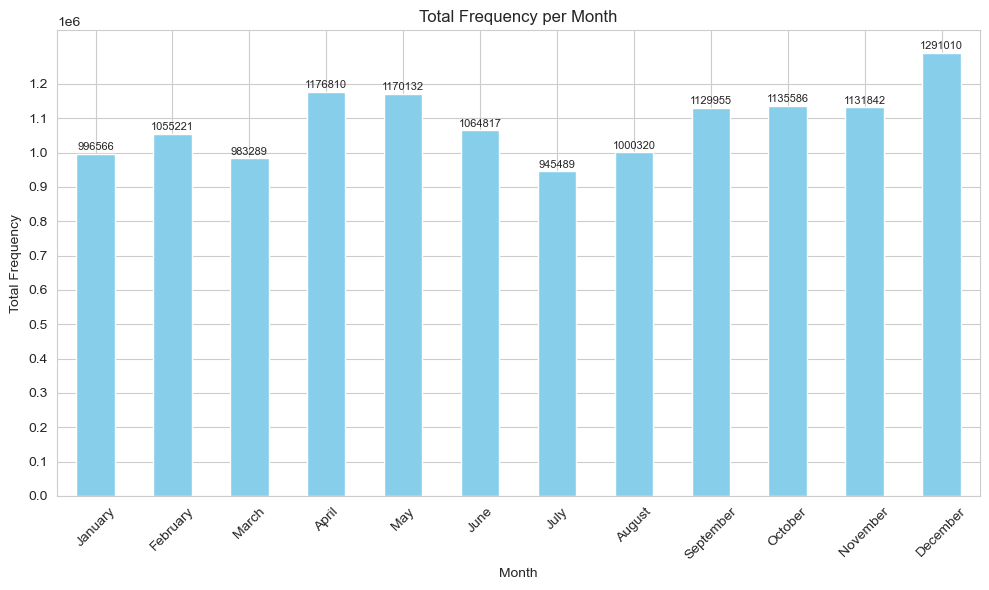

In [22]:
total_frequency_per_month = data.groupby('month').size()

# Reorder the months
months_ordered = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Reindex the total_frequency_per_month DataFrame with months_ordered
total_frequency_per_month = total_frequency_per_month.reindex(months_ordered, axis=0)

# Plotting
plt.figure(figsize=(10, 6))

# Bar plot
total_frequency_per_month.plot(kind='bar', color='skyblue')

# Add text labels to each bar indicating the frequency
for i, v in enumerate(total_frequency_per_month):
    plt.text(i, v + 5000, str(v), ha='center', va='bottom', fontsize=8)

# Set labels and title
plt.xlabel('Month')
plt.ylabel('Total Frequency')
plt.yticks(np.arange(0, 1300000, 100000))
plt.title('Total Frequency per Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Total Ticket Submissions per Month

This graph depicts the overall number of lottery tickets submitted each month throughout the year. The x-axis represents the month (reordered alphabetically for clarity), and the y-axis represents the total number of tickets submitted in that month. The bars show the monthly distribution of ticket submissions, potentially revealing periods with higher or lower overall activity.


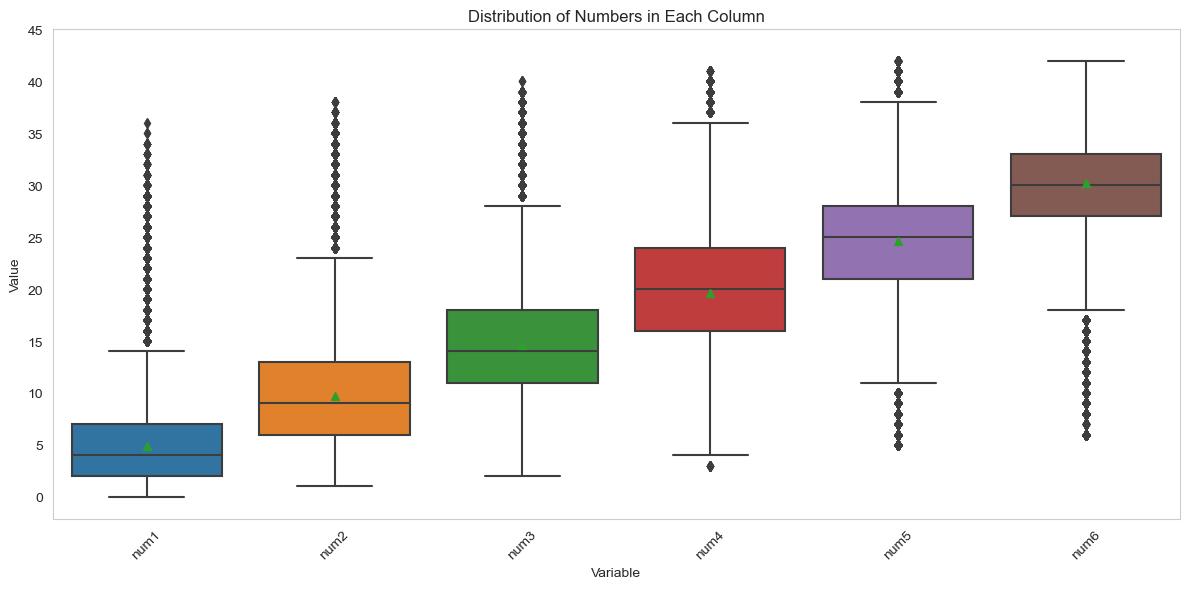

In [23]:
data_subset = data[['num1', 'num2', 'num3', 'num4', 'num5', 'num6']]

# Melt the DataFrame to create a format suitable for seaborn boxplots
# This reshapes the data with 'variable' column for column names and 'value' for data points
data_melted = pd.melt(data_subset, var_name='variable', value_name='value')

# Create a figure with appropriate size for multiple plots
plt.figure(figsize=(12, 6))

# Use boxplot function with melted data and orient='h' for horizontal layout
sns.boxplot(
    x="variable",
    y="value",
    showmeans=True,  # Optionally show mean as a point
    data=data_melted
)

# Set x ticks with a difference of 5
plt.xticks(np.arange(0, len(data_subset.columns)), labels=data_subset.columns, rotation=45)

# Set y ticks from 0 to 45 with a difference of 5
plt.yticks(np.arange(0, 46, 5))

plt.xlabel('Variable')  # Label x-axis to reflect data names
plt.ylabel('Value')
plt.title('Distribution of Numbers in Each Column')
plt.grid(axis='y')
plt.tight_layout()  # Adjust spacing to prevent overlapping elements
plt.show()

#### Distribution of Numbers Selected in Lottery Tickets

This graph visualizes the distribution of numbers chosen for each of the six lottery number columns (`num1` through `num6`) within the simulated tickets. It employs horizontal box plots to reveal the central tendencies (medians) and variability of the selected numbers in each column. The diamond markers indicate the mean for each column.

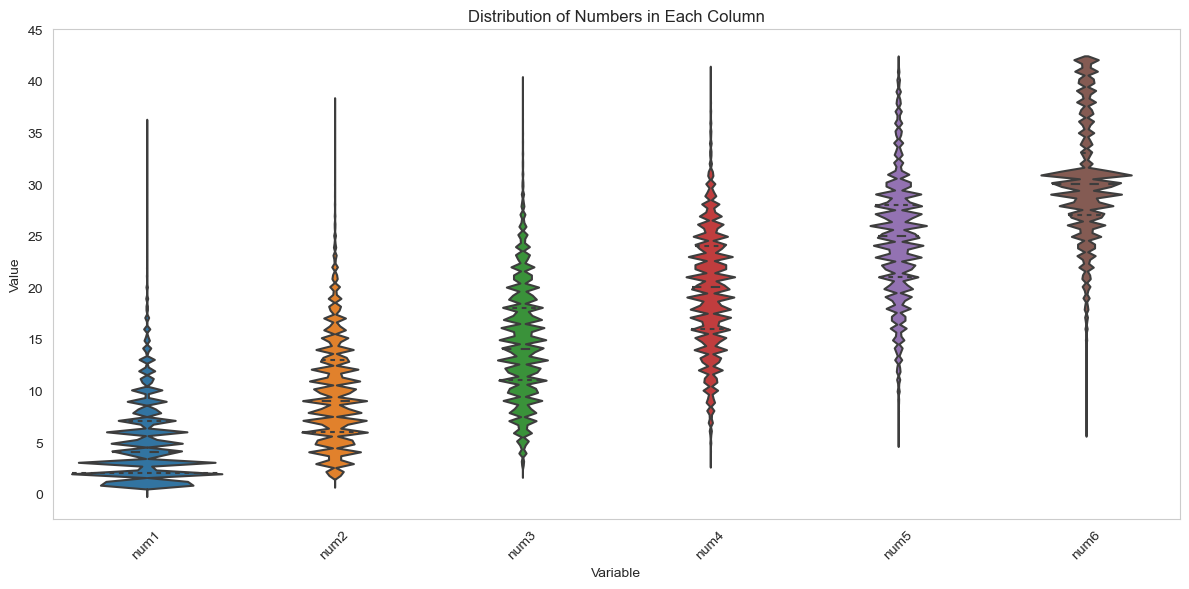

In [24]:
data_subset = data[['num1', 'num2', 'num3', 'num4', 'num5', 'num6']]

data_melted = pd.melt(data_subset, var_name='variable', value_name='value')

plt.figure(figsize=(12, 6))

sns.violinplot(
    x="variable",
    y="value",
    data=data_melted,
    inner="quartile",  # Optionally show quartiles inside the violins
    linewidth=1.5  # Increase line width for better visibility
)

plt.xticks(np.arange(0, len(data_subset.columns)), labels=data_subset.columns, rotation=45)
plt.yticks(np.arange(0, 46, 5))
plt.xlabel('Variable')
plt.ylabel('Value')
plt.title('Distribution of Numbers in Each Column')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

#### Distribution of Numbers in Lottery Tickets Using Violin Plots

This graph utilizes violin plots to visualize the distribution of numbers chosen for each of the six lottery number columns (`num1` through `num6`) within the simulated tickets. Violin plots provide a richer understanding of the distributions, depicting both density and spread. The white dots inside the violins represent the quartiles, indicating central tendencies.

In [25]:
date_counts = data.groupby('dates').size().reset_index(name='count')

In [26]:
date_counts

,dates,count
0,2022-01-04,58506
1,2022-01-06,65303
2,2022-01-08,29175
3,2022-01-11,25326
4,2022-01-13,31076
...,...,...
303,2023-12-21,48140
304,2023-12-23,50667
305,2023-12-26,61345
306,2023-12-28,64801


In [27]:
date_counts_df = pd.DataFrame(date_counts)

In [28]:
date_counts_df.rename(columns={'count': 'Number of participants'}, inplace=True)
date_counts_df

,dates,Number of participants
0,2022-01-04,58506
1,2022-01-06,65303
2,2022-01-08,29175
3,2022-01-11,25326
4,2022-01-13,31076
...,...,...
303,2023-12-21,48140
304,2023-12-23,50667
305,2023-12-26,61345
306,2023-12-28,64801


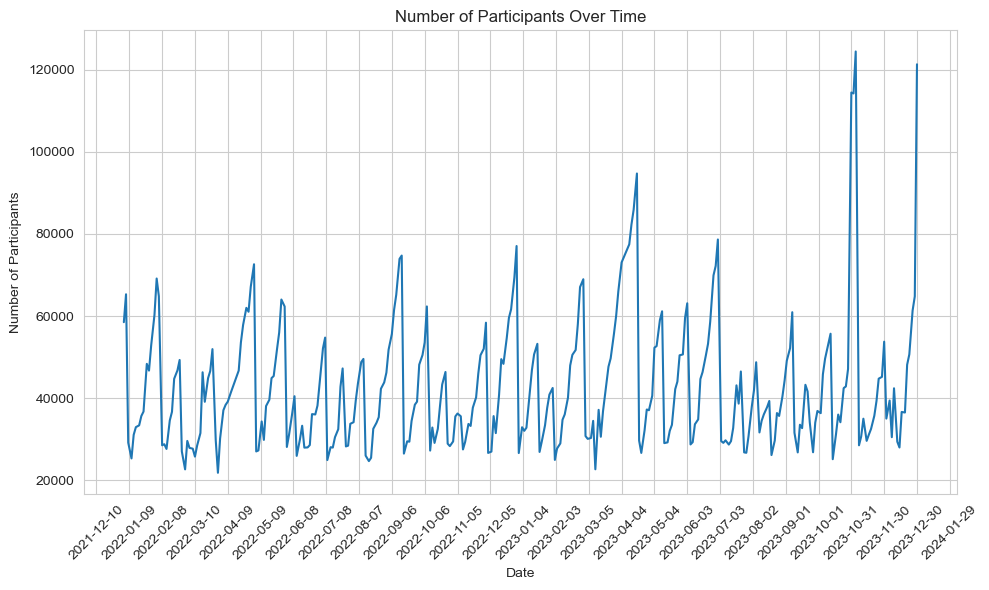

In [29]:
plt.figure(figsize=(10, 6))  # Set the figure size

# Plot the line plot
plt.plot(pd.to_datetime(date_counts_df['dates']), date_counts_df['Number of participants'], linestyle='-')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Number of Participants')
plt.title('Number of Participants Over Time')

# Set the date format on the x-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Set the frequency of x-axis ticks (every 7 days)
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=30))  # Adjust interval as needed

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

#### Number of Lottery Participants Over Time

This graph tracks the number of lottery participants across different dates. It employs a line plot to visualize the temporal trend in participation. The x-axis represents the dates, formatted as "YYYY-MM-DD," with 30-day intervals between tick marks for clarity. The y-axis represents the total number of participants on each date. The line's trajectory reveals whether participation has increased, decreased, or remained relatively stable over time.


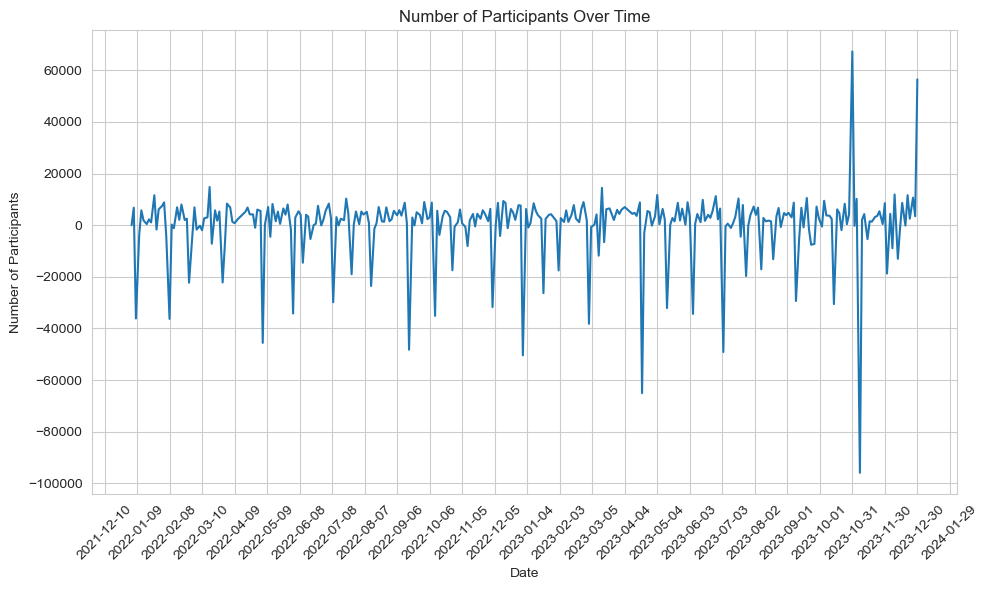

In [30]:
plt.figure(figsize=(10, 6))  # Set the figure size

# Plot the line plot
plt.plot(pd.to_datetime(date_counts_df['dates']), date_counts_df['Number of participants'].diff().fillna(0), linestyle='-')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Number of Participants')
plt.title('Number of Participants Over Time')

# Set the date format on the x-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Set the frequency of x-axis ticks (every 7 days)
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=30))

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

#### Daily Changes in Lottery Participation

This graph captures the daily changes in the number of lottery participants throughout the time period. It depicts a line plot of the difference in participation between consecutive dates. The x-axis represents the dates (YYYY-MM-DD), with 30-day intervals between tick marks. The y-axis represents the change in the number of participants from one day to the next. Positive values indicate an increase in participation, while negative values indicate a decrease. Zero values represent days with no change in participation.

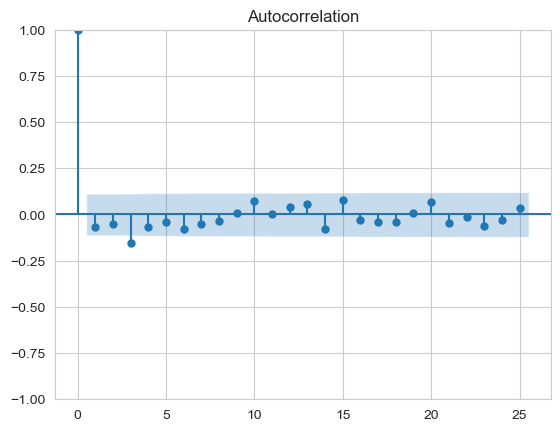

In [31]:
plot_acf(date_counts_df['Number of participants'].diff().fillna(0))

plt.show()

#### Autocorrelation of Daily Participation Changes

This graph presents the Autocorrelation Function (ACF) of the daily changes in lottery participation. The ACF measures the correlation between a time series and itself at various time lags. In this context, it helps us identify potential patterns in participation fluctuations. The x-axis represents the time lag (in days) between observations. The y-axis indicates the correlation coefficient. If the correlation is significant at a specific lag (i.e., the value is far from zero), it suggests that participation on a given day might be related to participation on a previous day that is that many days apart. 

In [32]:
diff_data = date_counts_df['Number of participants'].diff().fillna(0)
diff_data

0          0.0
1       6797.0
2     -36128.0
3      -3849.0
4       5750.0
        ...   
303    11631.0
304     2527.0
305    10678.0
306     3456.0
307    56511.0
Name: Number of participants, Length: 308, dtype: float64

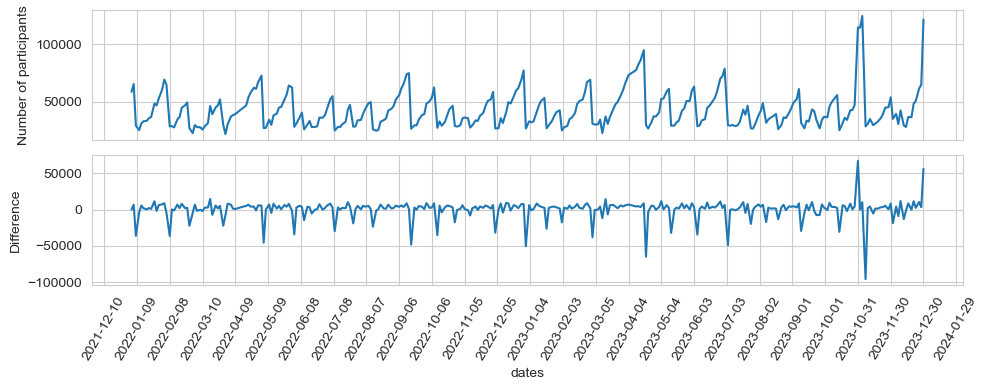

In [33]:
fig, ax = plt.subplots(nrows=2, figsize=(10, 4), sharex=True)

# Plot the first Line plot
sns.lineplot(x=pd.to_datetime(date_counts_df['dates']), y=date_counts_df['Number of participants'], ax=ax[0])

# Plot the second Line plot
sns.lineplot(x=pd.to_datetime(date_counts_df['dates']), y=diff_data, ax=ax[1])

# Set y-label for the second plot
ax[1].set_ylabel('Difference')

# Set x-axis date format
ax[1].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Set x-axis ticks frequency (show every 14 days)
ax[1].xaxis.set_major_locator(mdates.DayLocator(interval=30))

# Add minor ticks between major ticks (every 2 days)
ax[1].xaxis.set_minor_locator(mdates.DayLocator(interval=30))

# Rotate x-axis Labels for better readability
plt.xticks(rotation=60)  # Increased rotation to 60 degrees

# Show the plot
plt.tight_layout()

plt.show()

#### Number of Participants and Daily Changes Over Time

This figure presents a combined plot that visualizes both the number of lottery participants and the daily changes in participation across different dates. The figure consists of two vertically stacked line plots:

**Top Plot:**
- Depicts the total number of lottery participants for each date.
- x-axis: Dates (YYYY-MM-DD)
- y-axis: Number of participants

**Bottom Plot:**
- Illustrates the daily changes in participation (the difference between consecutive dates).
- x-axis: Dates (YYYY-MM-DD)
- y-axis: Difference in participation

These plots, when viewed together, allow us to observe both the overall trend in participation and the granular daily fluctuations.

In [34]:
MA_Q = 18
conv_array = np.repeat(1/(MA_Q+1), MA_Q+1)
conv_array

array([0.05263158, 0.05263158, 0.05263158, 0.05263158, 0.05263158,
       0.05263158, 0.05263158, 0.05263158, 0.05263158, 0.05263158,
       0.05263158, 0.05263158, 0.05263158, 0.05263158, 0.05263158,
       0.05263158, 0.05263158, 0.05263158, 0.05263158])

In [35]:
bound_val = int(MA_Q/2)
date_counts_df.iloc[bound_val:-bound_val,0]

9      2022-01-25
10     2022-01-27
11     2022-01-29
12     2022-02-01
13     2022-02-03
          ...    
294    2023-11-30
295    2023-12-02
296    2023-12-05
297    2023-12-07
298    2023-12-09
Name: dates, Length: 290, dtype: object

In [36]:
ma_data = np.convolve(diff_data, conv_array, mode='valid')
ma_data

array([-1.25957895e+03, -1.14905263e+03, -1.08321053e+03,  9.26052632e+02,
        1.26189474e+03, -2.12526316e+02, -5.41052632e+02, -1.99578947e+02,
       -4.08631579e+02, -4.75789474e+02, -1.18947368e+03, -9.60947368e+02,
       -1.12542105e+03, -7.35473684e+02, -1.57994737e+03, -1.04968421e+03,
        9.53473684e+02,  1.21905263e+03,  1.11842105e+02, -6.70947368e+02,
       -3.40578947e+02, -4.03157895e+02, -4.42526316e+02, -5.34210526e+02,
        7.61473684e+02,  1.26626316e+03,  1.26242105e+03,  1.57436842e+03,
        1.80494737e+03,  1.85684211e+03,  2.03442105e+03,  2.16415789e+03,
       -1.01447368e+03, -6.23842105e+02, -5.55526316e+02, -8.84263158e+02,
       -7.29947368e+02,  5.18315789e+02,  1.21342105e+03,  7.99789474e+02,
        7.80526316e+02,  9.28105263e+02,  1.30915789e+03,  1.09531579e+03,
       -9.79000000e+02, -1.18426316e+03, -1.12284211e+03, -1.13257895e+03,
       -1.84710526e+03, -1.95336842e+03, -2.07005263e+03,  4.86315789e+01,
        3.88421053e+01, -

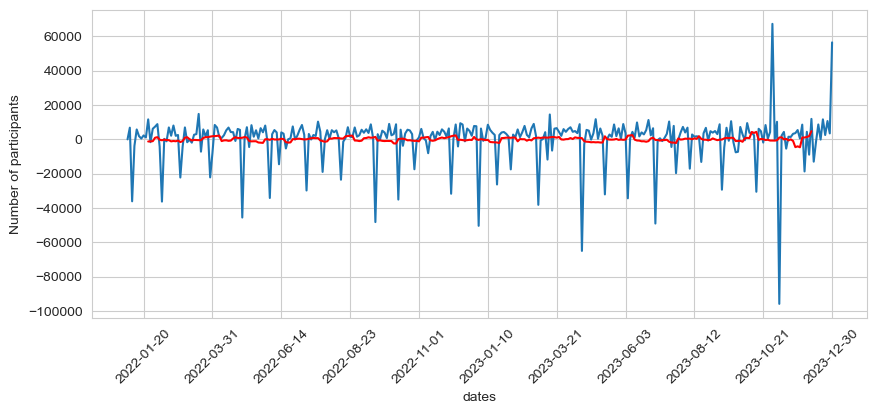

In [37]:
fig, ax = plt.subplots(figsize=(10, 4))

sns.lineplot(x=date_counts_df['dates'], y=diff_data, ax=ax)
sns.lineplot(x=date_counts_df.iloc[bound_val:-bound_val, 0], y=ma_data, ax=ax, color='red')

# Set x-axis major tick intervals
ax.xaxis.set_major_locator(mdates.DayLocator(interval=30))  # Show ticks every 7 days

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

plt.show()

#### Daily Changes in Lottery Participation with Moving Average

This plot overlays two lines to visualize both the daily changes in lottery participation and a smoothed version of these changes using a moving average. It employs two line plots:

- **Blue Line:** Represents the daily changes in participation (the difference between consecutive dates).
- **Red Line:** Depicts a moving average of the daily changes, which smooths out short-term fluctuations and reveals longer-term trends.

The x-axis represents the dates, and the y-axis represents the magnitude of change in participation.

In [38]:
resid_data = diff_data.iloc[bound_val:-bound_val] - ma_data
resid_data

9      12881.578947
10      -503.947368
11      7250.210526
12      6473.947368
13      7601.105263
           ...     
294     7529.473684
295   -19781.315789
296     3014.315789
297   -10787.526316
298     7165.684211
Name: Number of participants, Length: 290, dtype: float64

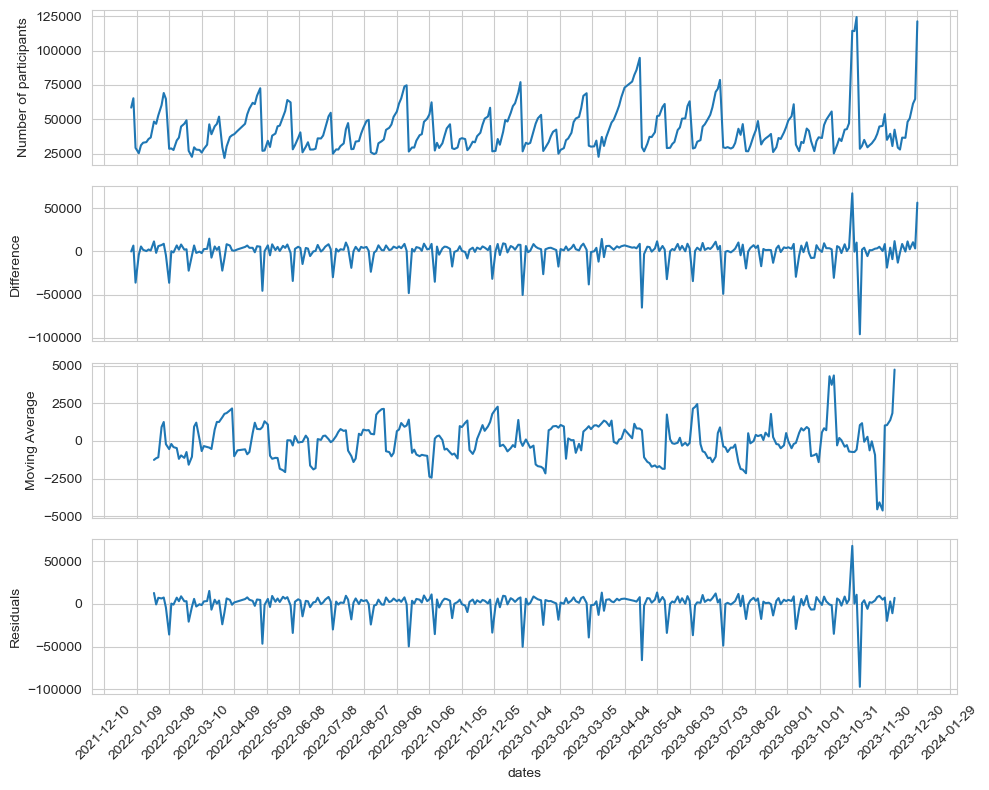

In [39]:
fig, ax = plt.subplots(nrows=4, figsize=(10, 8), sharex=True)

# Plot the line plots
sns.lineplot(x=pd.to_datetime(date_counts_df['dates']), y=date_counts_df['Number of participants'], ax=ax[0])
sns.lineplot(x=pd.to_datetime(date_counts_df['dates']), y=diff_data, ax=ax[1])
sns.lineplot(x=pd.to_datetime(date_counts_df.iloc[bound_val:-bound_val, 0]), y=ma_data, ax=ax[2])
sns.lineplot(x=pd.to_datetime(date_counts_df.iloc[bound_val:-bound_val, 0]), y=resid_data, ax=ax[3])

# Set y-labels
ax[1].set_ylabel('Difference')
ax[2].set_ylabel('Moving Average')
ax[3].set_ylabel('Residuals')

# Adjust x-axis formatting
ax[-1].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Set date format
ax[-1].xaxis.set_major_locator(mdates.DayLocator(interval=30))     # Show ticks every 14 days
ax[-1].xaxis.set_minor_locator(mdates.DayLocator(interval=30))      # Add minor ticks between major ticks
plt.xticks(rotation=45)                                       # Rotate x-axis labels for readability

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

#### Comprehensive Analysis of Lottery Participation Over Time

This figure presents a comprehensive view of lottery participation patterns by combining multiple visualizations into a single figure with four vertically stacked line plots:

**Top Plot:**
- Shows the total number of lottery participants for each date.
- x-axis: Dates (YYYY-MM-DD)
- y-axis: Number of participants

**Second Plot:**
- Illustrates the daily changes in participation (the difference between consecutive dates).
- x-axis: Dates (YYYY-MM-DD)
- y-axis: Difference in participation

**Third Plot:**
- Depicts a moving average of the daily changes, smoothing out short-term fluctuations and highlighting longer-term trends.
- x-axis: Dates (YYYY-MM-DD)
- y-axis: Moving average of daily changes

**Bottom Plot:**
- Displays the residuals, which are the differences between the actual daily changes and the predicted changes based on the moving average. Residuals can help identify any remaining patterns or anomalies in the data.
- x-axis: Dates (YYYY-MM-DD)
- y-axis: Residuals

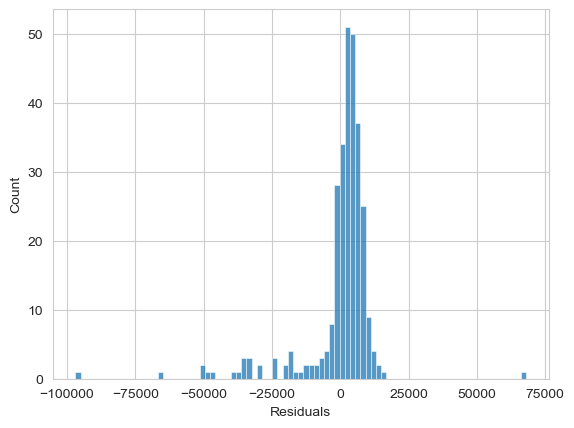

In [40]:
fig, ax = plt.subplots()

sns.histplot(x=resid_data, ax=ax)
ax.set_xlabel('Residuals')

plt.show()

#### Distribution of Residuals in Lottery Participation Analysis

This histogram visualizes the distribution of the residuals from the analysis of lottery participation over time. Residuals represent the differences between the actual daily changes in participation and the predicted changes based on the moving average. Examining their distribution can help assess how well the model fits the data and identify any remaining patterns or anomalies.

**Key Elements:**
- x-axis: Residuals (the differences between actual and predicted changes)
- y-axis: Frequency (number of occurrences for each range of residuals)
- Shape of the distribution: Indicates whether residuals are centered around zero (suggesting a good model fit) or if they exhibit any patterns suggesting potential issues with the model.

<a name="res_dis"></a>
## Results and Discussions
***

This data exploration revealed several interesting insights into lottery participation patterns:

* **Overall Participation Trends:** The line plot depicting the number of participants suggests a possible seasonal variations considering the months being observed for all regions.
* **Daily Fluctuations:** The plot of daily changes in participation highlights relatively consistent participation among those in every region, however further analysis may be required considering in the months of December and April have higher count, but greatly decrease by July.
* **Moving Average and Residuals:** By incorporating a moving average, we were able to smooth out short-term fluctuations and identify potential longer-term trends in participation. Analyzing the residuals provided further insights into any remaining deviations from the moving average, suggesting that there might be a clustering of data points around zero. This indicates that the model might be capturing the majority of the variation in the data, with minimal discrepancies between observed and predicted values. However, it also raises the possibility of a systematic bias or an inherent characteristic in the data that is not accounted for by the model. Further investigation is warranted to understand the underlying reasons for this clustering and its implications for the analysis.
* **Distribution of Winning Numbers:** The frequency distribution of winning numbers revealed no clear bias towards specific numbers.
* **Location-wise Participation:** The visualization of ticket submissions by location suggests potential likelihood of winners to come from those with a higher population.

These initial findings provide a valuable foundation for further analysis. Future investigations could involve:

* **Correlational Analysis:** Exploring potential correlations between participation levels and external factors like holidays, jackpots, or economic conditions.
* **Predictive Modeling:** Developing models to predict future participation trends based on historical data and potentially identified influencing factors.
* **Segmentation Analysis:** Segmenting participants based on demographics or other characteristics to understand variations in participation patterns across different groups.

By continuing this data exploration, we can gain a deeper understanding of the dynamics of lottery participation and potentially develop strategies to improve engagement or optimize lottery operations.

[ref]: #top
[Back to Table of Contents][ref]

<a name="conc"></a>
## Conclusion and Recommendations
***

#### Conclusion

This exploration investigated lottery participation patterns using various visualizations. The analysis revealed interesting trends, including a possible relationship between the prize money and number of participants and the same relationship being seen from the EDA which again, states the relationship of participants  towards the amount of the prize through being able to see the daily fluctuations. By incorporating a moving average, we were able to identify potential long-term trends and assess deviations through residual analysis. The distribution of winning numbers reveals that it is generally randomized with similar distributions apart from exceptions such as numbers that lie within the middle and outer parts with either greater or lower chances. Finally, location-based participation stated that locations of NCR, Visayas and Mindanao have equal rates of submission, while Luzon has the greatest amount of submissions.

These findings suggest potential areas for further exploration. Correlational analysis could examine relationships between participation and external factors. Predictive models could forecast future trends. Segmentation analysis could reveal variations across participant groups. By delving deeper into these areas, we can gain a comprehensive understanding of lottery participation dynamics and develop strategies to increase participation by people from differing locations around the country, or find better ways to distribute the prize winning in order to increase participants.


#### Recommendations

Based on the findings from this data exploration, we recommend the following:

* **Correlational Analysis:** Conduct a correlation analysis to explore potential relationships between participation levels and external factors that might influence participation, such as holidays, jackpot sizes, or economic conditions. This could provide valuable insights into the drivers of participation.
* **Predictive Modeling:** Develop machine learning models to predict future participation trends. By leveraging historical data and potentially identified influencing factors, these models could forecast participation levels and aid in planning lottery operations or marketing strategies.
* **Segmentation Analysis:** Segment lottery participants based on demographics or other relevant characteristics. This could reveal variations in participation patterns across different groups. For instance, analyzing participation by age groups might identify segments with lower engagement and inform targeted outreach strategies.

By implementing these recommendations, we can gain a deeper understanding of lottery participation and leverage this knowledge to 

[ref]: #top
[Back to Table of Contents][ref]

<a name="refe"></a>
## References
***

*Ching-Chung, L., Hsin-Hong, K., & Shih-Ju, C. (2005). Lotto sales and marketing implication: a time-series approach. Tai Da Guan Li Lun Cong, 15(2), 99.*


*Farrell, L., Morgenroth, E., & Walker, I. (1999). A time series analysis of UK lottery sales: long and short run price elasticities. oxford Bulletin of Economics and Statistics, 61(4), 513-526.*

*Forrest, D., Gulley, O. D., & Simmons, R. (2005). The relationship between betting and lottery play: A high frequency time-series analysis. Lancaster University Management School Working Paper, (2005/046).*

*Forrest, D. (2005). Time-series modelling of Lotto demand. The economics of gambling, 198-219.*

*Kirenz, D. (2019). Time Series Analysis First Steps. GitHub. https://github.com/kirenz/time-series-analysis/blob/master/time-series-first-steps.ipynb*

*LotteryTexts. (2024). Lotto 6/42 (Philippines) statistics. Retrieved March 16, 2024, from https://lotterytexts.com/philippines/lotto-6-42/statistics/*

*Paz, M. (2021). Time Series Analysis with Python: A Tutorial for Beginners. Medium. https://medium.com/@matthew.paz/time-series-analysis-with-python-a-tutorial-for-beginners-898a3300ce9a*

*Socrata (2019). Time Series Analysis with Jupyter Notebooks and Socrata. Socrata Developer Blog. https://dev.socrata.com/blog/2019/10/07/time-series-analysis-with-jupyter-notebooks-and-socrata.html*

*The Data Visualization Catalogue. (n.d.). Density Plot. https://datavizcatalogue.com/methods/density_plot.html*

[ref]: #top
[Back to Table of Contents][ref]